# Our first Program in C
We will develop and run some simple C programs to illustrate basic elements of C programming. Most probably this is not going to be fully understandable. But for now we need to accept things as they are.

Our first program is a famous "Hello world!" program. That is a program that just prints something and terminates:

In [2]:
#include <stdio.h>

int main()
{
    printf("Hello students this is a pice of code!!\n");
}

Hello students this is a pice of code!!


This program is as simple as it gets, but it already contains elements that are new and will need to be explained. Which we will be doing gradually over next lectures.

Let try to compile this program on a computer, not in a Jupyter notebook

`gcc hello.c` will perform the entire compilation process for us and result in an executable file.

Split in steps:
* `gcc -E hello.c -o hello.i ` or `cpp hello.c -o hello.i` - preprocessor: produces an enriched version of the original source code.
* `gcc -S hello.i -o hello.s` - produces the assembly code, a low-level programming code that closely corresponds to machine code instructions. More readable than raw binary code, but already architecture-specific (like x86 or ARM).
* `gcc -c hello.s -o hello.o` or `as hello.s -o hello.o` - The assembler produces machine code. A binary representation of instructions that a computer's CPU executes. Consists of sequences of binary digits (0s and 1s).
* `gcc hello.o -o hello` - the last step is linking. Here function calls are resolved to appropriate libraries and an executable is created. Non-Human readable, good to identify Skynet operatives.

Note: In case we would use additional libraries the call to `gcc` would become more complex (we will see this when using the math library).


Test also: https://godbolt.org/

## Basic elements of a C program

### Lower and upper case letters
C is case sensitive. This means that *a* and *A* are not the same! Make sure to use the proper case letters.

The two examples below will not work because of the wrong case letters in function names.

In [3]:
#include <stdio.h>

int Main() // should be main
{
    printf("Hello students this is a pice of code!!\n");
}

/tmp/tmp5aa5fddj.out: /tmp/tmp95f1fbbs.out: undefined symbol: main
[C kernel] Executable exited with code 1

In [6]:
#include <stdio.h>

int main()
{
    Printf("Hello students this is a pice of code!!\n");
}//printf not Printf

/tmp/tmpr0fynclk.c: In function ‘main’:
/tmp/tmpr0fynclk.c:5:5: warning: implicit declaration of function ‘Printf’; did you mean ‘printf’? [-Wimplicit-function-declaration]
    5 |     Printf("Hello students this is a pice of code!!\n");
      |     ^~~~~~
      |     printf
/tmp/tmp5aa5fddj.out: symbol lookup error: /tmp/tmp2m45cqgm.out: undefined symbol: Printf
[C kernel] Executable exited with code 127

### Different types of brackets
Another thing to look out for are the brackets. We can use (), {}, \[\], each means something different and we can not mix those. This example will not work because brackets are wrong:

In [7]:
#include <stdio.h>

int main{} //should be ()
( // should be {}
    printf["Hello students this is a pice of code!!\n"];
)

/tmp/tmpiyz_q0rn.c:3:9: error: expected ‘=’, ‘,’, ‘;’, ‘asm’ or ‘__attribute__’ before ‘{’ token
    3 | int main{} //should be ()
      |         ^
/tmp/tmpiyz_q0rn.c:5:56: error: expected ‘)’ before ‘;’ token
    5 |     printf["Hello students this is a pice of code!!\n"];
      |                                                        ^
      |                                                        )
[C kernel] GCC exited with code 1, the executable will not be executed

### Things we use need a name
As our program develops we will need to give names to things we create and use in order to identify them. Let us see what are some admissible names:

We will ad a variable that is going to be the type of *int*. We do this by writing the keyword *int* followed by the variable name:

In [ ]:
int variable_name;

We start by naming our variable with one of the reserved keywords, and note that we can not do that:

In [8]:
#include <stdio.h>

int main()
{
    int double; // can not do that
    
    printf("Hello students this is a pice of code!!\n");
}

/tmp/tmporo62elt.c: In function ‘main’:
/tmp/tmporo62elt.c:5:9: error: two or more data types in declaration specifiers
    5 |     int double; // can not do that
      |         ^~~~~~
/tmp/tmporo62elt.c:5:5: warning: useless type name in empty declaration
    5 |     int double; // can not do that
      |     ^~~
[C kernel] GCC exited with code 1, the executable will not be executed

But we can do this (why?): 

In [9]:
#include <stdio.h>

int main()
{
    int Double; // can do that
   
    printf("Hello students this is a pice of code!!\n");
}

Hello students this is a pice of code!!


Well since C is case sensitive Double is not a keyword that double is.  
We can also do this:

In [10]:
#include <stdio.h>

int main()
{
    int _myVariabl; // can do that
    int myVariabl; // can do that
    
    printf("Hello students this is a pice of code!!\n");
}

Hello students this is a pice of code!!


Both myVariable and _myVariable are legal names. We can not start with a digit:

In [12]:
#include <stdio.h>

int main()
{
    int 9_myVariabl; // can not do that
    
    printf("Hello students this is a pice of code!!\n");
}

/tmp/tmpq03t15u9.c: In function ‘main’:
/tmp/tmpq03t15u9.c:5:9: error: invalid suffix "_myVariabl" on integer constant
    5 |     int 9_myVariabl; // can not do that
      |         ^~~~~~~~~~~
/tmp/tmpq03t15u9.c:5:9: error: expected identifier or ‘(’ before numeric constant
[C kernel] GCC exited with code 1, the executable will not be executed

## Comments in the code
Comments are used to document and explain the code. And it is a good idea to use them.

In [ ]:
/*
   This is a multiline comment
*/

// this is a single line comment
// and each time I start a new line I need to add the // at the beggining

Let's have a Hello World program with comments for explanation:

In [13]:
/*
    Start with a short description of the program
    This program prints an important information
    to all the students
*/
# include <stdio.h>      // Append the I/O library

int main()               // main function definition starts here
{                        // opening bracket
    printf("Hello students this is a pice of code!!\n"); // here i call the printf() function
}                        // closing bractes

Hello students this is a pice of code!!


## The structure of our program:
### Preprocessor directives  
Everything that starts with a # is a preprocessor directive. This will govern includes defines and other statements. For now please accept we need to have at least:
#### \#include<...>

In [ ]:
#include <stdio.h> // need to have it

in our program. This preprocessor directive is responsible for providing basic input/output operations. (std-standard, io-input/output)

Than our program reguieres an entry point. This is provided by a special function. it is called **main**. We have not said anything about functions, so for now we will accept it needs to be there. This function os of type **int** (whatever that means):

In [15]:
#include <stdio.h> // need to have it

int main() //our main function is an entry point
{
    // This here is the body of our main function. This is where instruction defining the program are placed
}

// int main()
// {
    
// }

Also, similarly to the immortal depicted in the highlander: **There can be only one!**

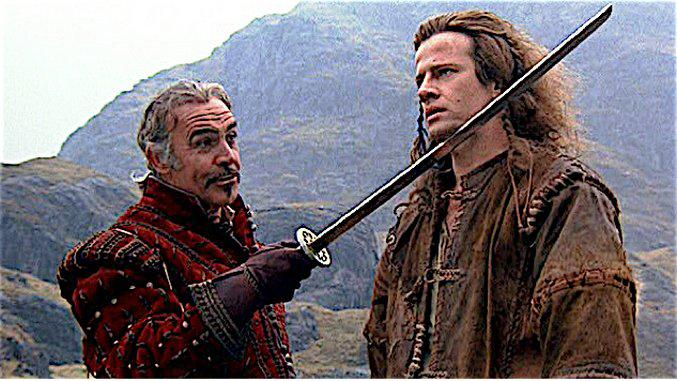

#### \#define
**define** is used to predefine values that will be used as constants and are known at the time of compilation:

In [ ]:
#define PI 3.141592

An example of the use of define (please nte that this example has been changed from the one shown during lecture):

In [19]:
#include <stdio.h> 
#define PI 3 // to zlo

int main()
{
    printf("%d\n", PI);
}

3


This requests the preprocessor to replace all occurrence of PI with 3 (good approximation). It should be used with care, as it can lead to some unexpected results if names important to the compiler become replaced. Consider the following:

In [47]:
#include <stdio.h> // need to have it
const int a = 5;// main da

int main()
{
    printf("Hello CS1 students!!\n");
}

Hello CS1 students!!


It fails since main has been replaced with da, and the actual code that is being compiled now looks like this:

In [24]:
#include <stdio.h> // need to have it
#define da main

int da()
{
    printf("Hello CS1 students!!\n");
}

Hello CS1 students!!


Which makes no sense.

### Functions and procedural programming paradigm
Procedural programing is a way of handling programming tasks where we write functions (procedures) and pass data between them in order to process them, generate more data and effectively perform tasks. The oposite is the object oriented programing, where we create objects that bind data and functionality in reasonable pieces that we can (in theory) work with and which can interact with each other.

We can add functions to our program. Consider a function that will work with two variables of type integer (**int** - we will discuss types, for now just bear with it)

In [25]:
#include <stdio.h> // need to have it

int main()
{
    sum(5,6); // this is a call to a function, but where is it?
}

/tmp/tmpmh14i7hx.c: In function ‘main’:
/tmp/tmpmh14i7hx.c:5:5: warning: implicit declaration of function ‘sum’ [-Wimplicit-function-declaration]
    5 |     sum(5,6); // this is a call to a function, but where is it?
      |     ^~~
/tmp/tmp5aa5fddj.out: symbol lookup error: /tmp/tmpm7j5q5n6.out: undefined symbol: sum
[C kernel] Executable exited with code 127

We try to use function sum() which has not been defined. We get a compilation error in line 6, column 5 that we try to use an undefined function. Have a look at the error message. Most probably you will be seeing this often.  

We need to add a definition of a function sum, for now it only prints the result:

In [26]:
#include <stdio.h>

//this is a new function that we just added
int sum() // definicja funkcji
{
    printf("This is a printf from function sum()\n");// we need to accept that %d must be there
}

int main()
{
    sum(); // wywolanie funkcji
}

This is a printf from function sum()


In [32]:
#include <stdio.h>

int sum(); // deklaracja funkcji

int main()
{
    sum(); // wywolanie funkcji
}

int sum() // definicja funkcji
{
    printf("This is a printf from function sum()\n");// we need to accept that %d must be there
}

This is a printf from function sum()


At the moment the sum() function only prints. Let it now provide us with the result:

In [34]:
#include <stdio.h>

int sum(int a, int b)
{
    //printf("a+b=%d\n", a+b); // we need to accept that %d must be there
    return a+b; // use return to provide VALUE out of the funtion
}

int main()
{
    printf("Hello CS1 students!!\n");
    sum(5,6); // main calls the sum() function
}

Hello CS1 students!!


For now main() function does nothing with the return value of the sum().

In [37]:
#include <stdio.h> // need to have it

int sum(int a, int b) //this is a new function that we just added
{
    //printf("a+b=%d\n", a+b); // we need to accept that %d must be there
    return a+b; // use return to provide VALUE otu of the funtion
}

int main()
{
    printf("Hello CS1 students!!\n");
    printf( "a+b=%d\n", sum(5,9) ); // I can call the function from the list of arguments of another
}

Hello CS1 students!!
a+b=-4


Let us now store the result of sum()

In [38]:
#include <stdio.h>

int sum(int a, int b) //this is a new function that we just added
{
    //printf("a+b=%d\n", a+b); // we need to accept that %d must be there
    return a+b; // use return to provide VALUE otu of the funtion
}

int main()
{
    printf("Hello CS1 students!!\n");
    int myNiceVariable = sum(5,6); // here copy the result of sum() to a variable
    printf("a+b=%d\n", myNiceVariable);
}

Hello CS1 students!!
a+b=11


In [46]:
#include <stdio.h>

int main()
{
    printf("%d aaa\naaa", (int)sizeof(int));
}

4 aaa
aaa